In [21]:
# /content/drive/MyDrive/Colab Notebooks/Data-Set/amazon.csv

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [23]:
df_amazon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-Set/amazon.csv")

In [24]:
df_amazon.shape

(1465, 16)

In [25]:
df_amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

Data type claenup

In [ ]:
df_amazon['rating'].unique()

In [27]:
df_amazon['rating'] = df_amazon['rating'].replace('|','0') # upading raitngs to a proper value

In [28]:
df_amazon['rating']= df_amazon['rating'].astype(float) # update rating to float

In [ ]:
df_amazon['rating'].dtype

In [ ]:
(df_amazon['rating_count'].value_counts())

In [ ]:
df_amazon['rating_count'].dtype

In [32]:
df_amazon['rating_count'] = df_amazon['rating_count'].str.replace(',','') # upading rating_count to remove comma

In [33]:
df_amazon['rating_count']= df_amazon['rating_count'].astype(float) # update rating_count to float

In [ ]:
# update the price data type to float

df_amazon['discounted_price'].dtype

In [ ]:
df_amazon['discounted_price'].value_counts()

In [58]:
# df_amazon['discounted_price'] = df_amazon['discounted_price'].str.replace("₹","")
df_amazon['discounted_price'] = df_amazon['discounted_price'].str.replace(",","")

In [60]:
df_amazon['discounted_price'] = df_amazon['discounted_price'].astype(float)

In [62]:
df_amazon['actual_price'] = df_amazon['actual_price'].str.replace("₹","")
df_amazon['actual_price'] = df_amazon['actual_price'].str.replace(",","")

In [63]:
df_amazon['actual_price'] = df_amazon['actual_price'].astype(float)

In [87]:
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].str.replace("%","")
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].astype(float)

In [88]:
# duplicate and null chk

len(df_amazon['product_id'].unique()) # total 1351 is unique keeping product id  so approx 100 rows are duplicate

df_no_duplicate = df_amazon.drop_duplicates(subset=['product_id'])

In [65]:
df_no_duplicate.shape # new data frame with unique value

(1351, 16)

In [66]:
df_no_duplicate.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [90]:
pd.set_option('display.max_rows', 20)

In [91]:
df_no_duplicate.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

Amazon Data Set

In [68]:
df_no_duplicate.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [39]:
pd.set_option('display.max_rows', 10)

In [69]:
# Q1 What is the average rating for each product category ?

df_temp = pd.DataFrame(df_no_duplicate.groupby('category')['rating'].mean())


In [70]:
# Create the scatter plot with Plotly
categories = df_temp.index
values = df_temp['rating']

fig = go.Figure()

# Add scatter trace
fig.add_trace(go.Scatter(x=values,y=categories,mode='markers',marker=dict(color='blue',size=6, symbol='x'),
                         text=[f'{val_top}<br>{val_bottom}' for val_top, val_bottom in zip(round(values,2), categories)],  # Combine both values,
                         hoverinfo='text',))

# Update layout
fig.update_layout(title='category and avg ratings ',
                  xaxis=dict(title='avg rating score', ),
                  yaxis=dict(title='Categories',showticklabels=False),
                  height=1000,  # Set height of the figure
                  )

# Show plot
fig.show()

# insight :
# comupter and electorcis are having highre ratings compare to other product category
# majority of the prodcuts in different category falls from 4 to 5 avg rating


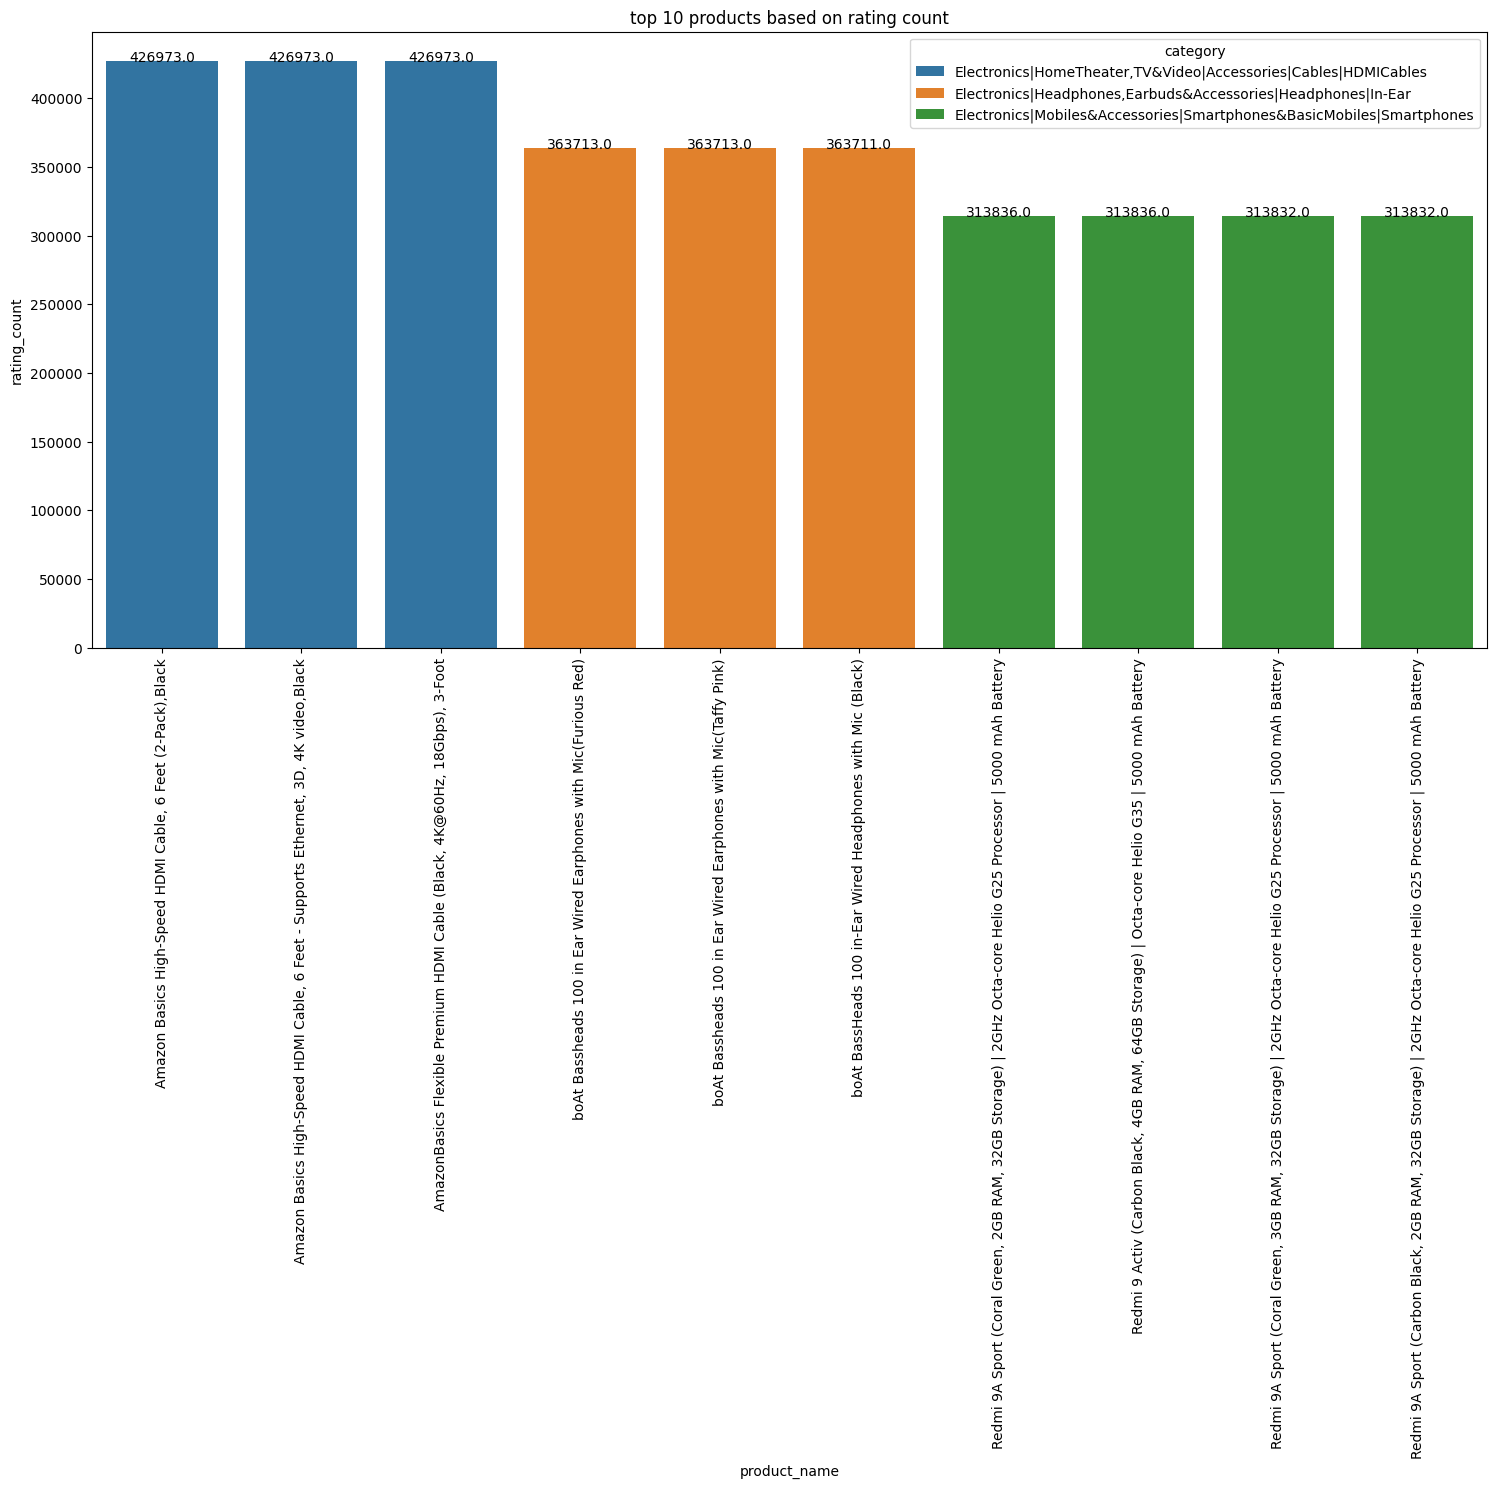

In [71]:
#Q2 What are the top rating_count products by category?

df_temp = df_no_duplicate.sort_values(by="rating_count", ascending=False).head(10)
categories = df_temp['product_name']
values = df_temp['rating_count']
plt.figure(figsize=(18,8))
# Create bar chart
# plt.bar(categories, values,hue=df_temp['category'])
sns.barplot(data=df_temp, x='product_name', y='rating_count', hue=df_temp['category'])
# Add labels and title

plt.xlabel('product_name')
plt.ylabel('rating_count')
plt.title('top 10 products based on rating count')
for i, value in enumerate(df_temp['rating_count']):
    plt.text(i, value + 0.5, str(round(value,2)), ha='center')
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [72]:
# Create the scatter plot with Plotly
df_temp = df_no_duplicate.sort_values(by="rating_count", ascending=False).head(100)
categories = df_temp['product_name']
values = df_temp['rating_count']
hues = df_temp['category']

fig = go.Figure()

# Add scatter trace
fig.add_trace(go.Scatter(x=values,y=categories,mode='markers',marker=dict(color='yellowgreen',size=6, symbol='diamond'),
                         text=[f'rating_count:{val_values}<br>product_name:{val_categories}<br>category:{val_hues}' for val_values, val_categories, val_hues in zip(round(values,2), categories,hues)],  # Combine both values,
                         hoverinfo='text'))

# Update layout
fig.update_layout(title='top 100 products based on rating count',
                  xaxis=dict(title='rating_count', ),
                  yaxis=dict(title='product_name',showticklabels=False),
                  height=800,  # Set height of the figure
                  )

# Show plot
fig.show()

# Products with the highest review counts within their categories might be considered potential top sellers, even without direct sales data.

Text(0.5, 0, 'Discounted Price')

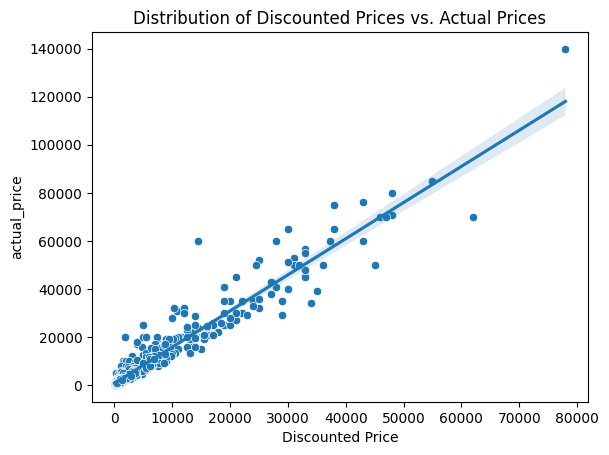

In [77]:
# 3 What is the distribution of discounted prices vs. actual prices?

# Create a scatter plot of discounted prices vs. actual prices
sns.scatterplot(data=df_no_duplicate, x="discounted_price", y="actual_price")

# Add a regression line to the plot
sns.regplot(data=df_no_duplicate, x="discounted_price", y="actual_price", scatter=False)

# Set the title and axis labels
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Discounted Price")
plt.ylabel("Actual Price")

# insight :
# most of the items are from price range 20k to 40 K
# highrer the actaul price , greater the discount for that product

In [82]:
# Create scatter plot
fig = px.scatter(df_no_duplicate, x="discounted_price", y="actual_price", hover_data=["product_name"])

# Show plot
fig.show()


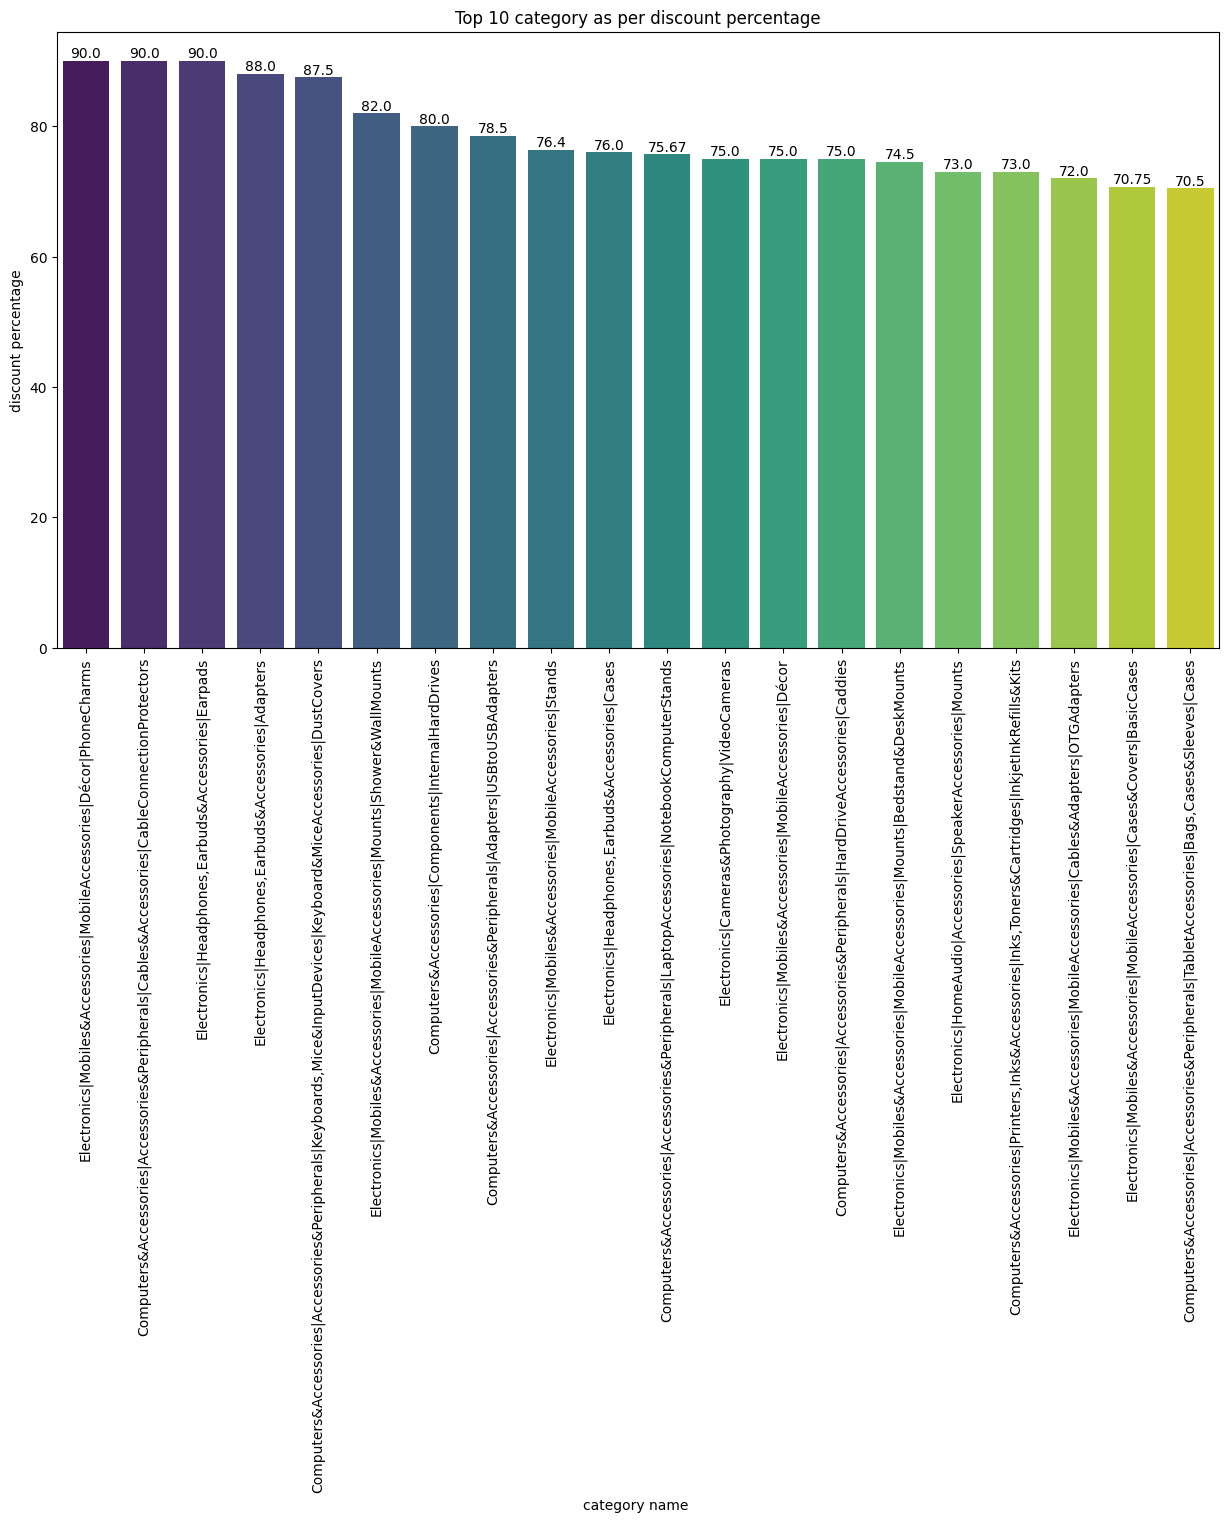

In [148]:
# 4. How does the average discount percentage vary across categories?

df = pd.DataFrame(df_no_duplicate.groupby('category')[['discount_percentage']].mean()['discount_percentage'].sort_values(ascending=False).head(20))

plt.figure(figsize=(15,8))
sns.barplot(x = df.index, y=df['discount_percentage'] ,data=df, palette='viridis',hue=df.index,legend=False)

plt.xlabel("category name ")
plt.ylabel("discount percentage")
plt.xticks(rotation=90)
plt.title("Top 10 category as per discount percentage")
for i, value in enumerate(df['discount_percentage']):
    plt.text(i, value + 0.5, round(value,2), ha='center')
plt.show()

# insight"
# computer and electronic products are having higer discounts.

In [133]:

df = pd.DataFrame(df_no_duplicate.groupby('category')[['discount_percentage']].mean()['discount_percentage'].sort_values(ascending=False))
categories =  df.index
values = df['discount_percentage']
hues =  df.index

fig = go.Figure()

# Add scatter trace
fig.add_trace(go.Scatter(x=values,y=categories,mode='markers',marker=dict(color='yellowgreen',size=6, symbol='diamond'),
                         text=[f'discount_percentage:{val_values}<br>category:{val_categories}' for val_values, val_categories in zip(round(values,2), categories)],  # Combine both values,
                         hoverinfo='text'))

# Update layout
fig.update_layout(title='categories based on discount percentage',
                  xaxis=dict(title='discount_percentage', ),
                  yaxis=dict(title='category',showticklabels=False),
                  height=800,  # Set height of the figure
                  )

# Show plot
fig.show()

In [142]:
# 5. What are the most popular product names?
df = df_no_duplicate.sort_values(by='rating', ascending=False).head(500)

px.scatter(data_frame=df, x="product_name",y="rating")

categories =  df.product_name
values = df['rating']

fig = go.Figure()

# Add scatter trace
fig.add_trace(go.Scatter(x=values,y=categories,mode='markers',marker=dict(color='yellowgreen',size=6, symbol='circle'),
                         text=[f'rating:{val_values}<br>product_name:{val_categories}' for val_values, val_categories in zip(round(values,2), categories)],  # Combine both values,
                         hoverinfo='text'))

# Update layout
fig.update_layout(title='top 500 products based on avg. ratings',
                  xaxis=dict(title='rating', ),
                  yaxis=dict(title='product name',showticklabels=False),
                  height=800,  # Set height of the figure
                  )

# Show plot
fig.show()

# many products are in the avg. rating range of 4.2 to 4.5

In [192]:
pd.set_option('display.max_colwidth', 100)

In [159]:
# 6. What are the most popular product keywords? (Assuming need to derive the kwywords from product name)

df  = df_no_duplicate.copy(deep=True)

def extract_keywords(product):
   keywords = product.lower().split()  # Split into words and lowercase
   keywords = [word for word in keywords if word.isalpha()]  # Remove non-alphabetical characters
   return keywords

# Apply the function to extract keywords
df["product_keywords"] = df["product_name"].apply(extract_keywords)

# df[['product_name','product_keywords']]

product_keywords = [keyword for keywords in df["product_keywords"] for keyword in keywords]
product_keywords

# # Count keyword occurrences
keyword_counts = pd.Series(product_keywords).value_counts()

# # Display the top 10 most popular keywords
print(keyword_counts.head(10))

# usb, charging fast suggest that the top selling products are from mobile/computer ctaegory

with        687
for         600
and         303
usb         300
cable       235
to          183
smart       158
fast        152
charging    152
c           142
dtype: int64


In [194]:
# Q7: What are the most popular product reviews?
from textblob import TextBlob  # Import TextBlob library

df  = df_no_duplicate.copy(deep=True)
# Select review column
df[["product_id", "user_id", "review_content"]]

# # Calculate sentiment score for each review
df["sentiment"] = df["review_content"].apply(lambda text: (TextBlob(text).sentiment.polarity))

# Sort by sentiment score (ascending for positive)
df_sorted = df.sort_values(by="sentiment", ascending=False)

df_sorted[["product_id", "user_id", "review_content","sentiment"]].head(10)
# df.dtypes
# Display top reviews based on a desired number (e.g., top 10)
top_reviews = df_sorted[["product_name","review_content"]].head(10)
print(top_reviews)


                                                                                             product_name  \
302               Technotech High Speed HDMI Cable 5 Meter V1.4 - Supports Full HD 1080p (Color May Vary)   
1309                                                Khaitan ORFin Fan heater for Home and kitchen-K0 2215   
872   CP PLUS 2MP Full HD Smart Wi-fi CCTV Security Camera | 360° with Pan Tilt | Two Way Talk | Cloud...   
1352                                                    Butterfly Hero Mixer Grinder, 500W, 3 Jars (Grey)   
625   Seagate Expansion 1TB External HDD - USB 3.0 for Windows and Mac with 3 yr Data Recovery Service...   
987   Foxin FTC 12A / Q2612A Black Laser Toner Cartridge Compatible with Laserjet 1020,M1005,1018,1010...   
134   AmazonBasics New Release ABS USB-A to Lightning Cable Cord, Fast Charging MFi Certified Charger ...   
750                                                          Eveready Red 1012 AAA Batteries - Pack of 10   
934   Cablet 2.5 In

In [196]:
# Q8. What is the correlation between discounted_price and rating?
df  = df_no_duplicate.copy(deep=True)
correlation = df["discounted_price"].corr(df["rating"])

# Print the correlation coefficient with two decimal places
print(f"Correlation between discounted price and rating: {correlation:.2f}")

# insight
# Discounted price and rating have a weak positive correlation.
# This means that products with higher discounted prices tend to have slightly higher ratings, but the relationship is not very strong.

Correlation between discounted price and rating: 0.12


In [208]:
#  Q9: What are the Top 5 categories based with highest ratings?
df  = df_no_duplicate.copy(deep=True)
# Group data by category and calculate average rating
average_ratings = df.groupby("category")["rating"].mean().reset_index()

# average_ratings
# # Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by="rating", ascending=False)

# Print the top 5 categories
print("Top 5 categories with highest average ratings:")
for i in range(5):
    category = average_ratings.iloc[i]["category"]
    average_rating = average_ratings.iloc[i]["rating"]
    print(f"{i+1}. {category}: {average_rating:.2f}")





Top 5 categories with highest average ratings:
1. Computers&Accessories|Tablets: 4.60
2. Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters: 4.50
3. Electronics|Cameras&Photography|Accessories|Film: 4.50
4. Electronics|HomeAudio|MediaStreamingDevices|StreamingClients: 4.50
5. OfficeProducts|OfficeElectronics|Calculators|Basic: 4.50


# 10. Identify any potential areas for improvement or optimization based on the data analysis.
Most of the hightest rated products are from simliar categories i.e. Computers/Electroics which shows high dependency on this category for sales. Team should to foucs on other categories like "Home&Kitchen" to genrate high number of sales overall